Shaffan Ahmed, Advanced Big Data and Data Mining, Lab 5

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
wine = load_wine()
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
data['target'] = wine.target

In [2]:
print(data.head())  # View first few rows
print(data.info())  # Check data types and missing values
print(data.describe())  # Get summary statistics

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = data.drop('target', axis=1)
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

In [4]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3)
clusters = hc.fit_predict(scaled_features)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

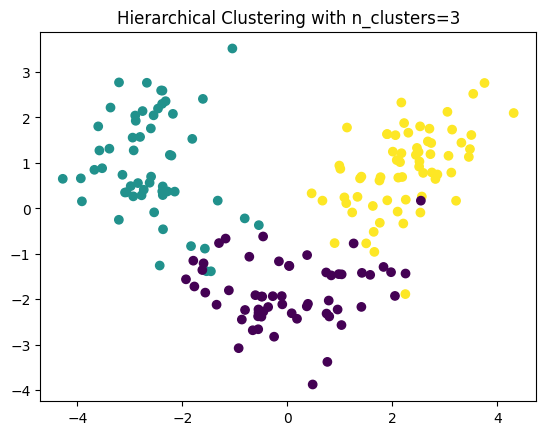

In [6]:
import matplotlib.pyplot as plt
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters)
plt.title('Hierarchical Clustering with n_clusters=3')
plt.show()

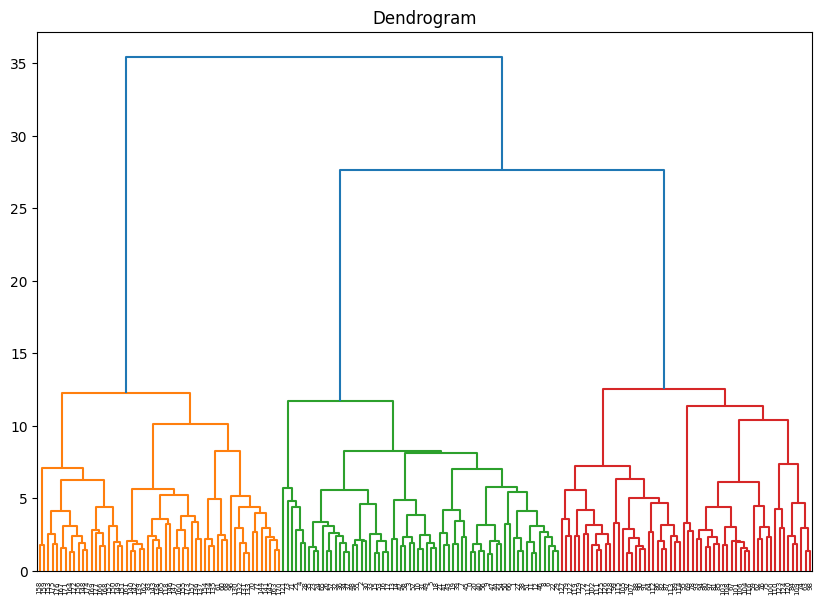

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.show()

In [8]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2, min_samples=5)
clusters_db = db.fit_predict(scaled_features)

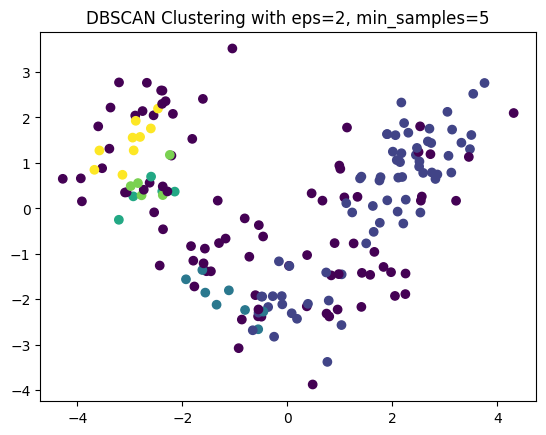

In [9]:
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters_db)
plt.title('DBSCAN Clustering with eps=2, min_samples=5')
plt.show()

In [10]:
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
true_labels = data['target']
sil_score = silhouette_score(scaled_features, clusters_db)
hom_score = homogeneity_score(true_labels, clusters_db)
comp_score = completeness_score(true_labels, clusters_db)
print('Silhouette Score:', sil_score)
print('Homogeneity Score:', hom_score)
print('Completeness Score:', comp_score)

Silhouette Score: -0.032906139982209724
Homogeneity Score: 0.36235372701413915
Completeness Score: 0.32473396566508933


In [12]:
hc = AgglomerativeClustering(n_clusters=3)
clusters_hc = hc.fit_predict(scaled_features)
sil_score_hc = silhouette_score(scaled_features, clusters_hc)
hom_score_hc = homogeneity_score(true_labels, clusters_hc)
comp_score_hc = completeness_score(true_labels, clusters_hc)

In [13]:
n_clusters = len(set(clusters_db)) - (1 if -1 in clusters_db else 0)
n_noise = list(clusters_db).count(-1)
print('Number of clusters:', n_clusters)
print('Number of noise points:', n_noise)

Number of clusters: 5
Number of noise points: 85


Hierarchical Clustering pros include being able to show hierarchical relationships and being useful for figuring out what a dendrogram means. However, it has some cons, like having to choose n_clusters and being hard to compute for large datasets.

DBSCAN's pros are that it can handle noise, find any shape, and you don't have to set up clusters ahead of time. However, its cons are that it is sensitive to eps and min_samples, and it might not work well with clusters of different densities.